# Setting Up Vizdoom

In [7]:
import gym

In [8]:
import vizdoom
print(vizdoom.__version__)

1.2.2


In [3]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom


The system cannot find the path specified.
Cloning into 'ViZDoom'...
Updating files:  20% (418/2057)
Updating files:  21% (432/2057)
Updating files:  22% (453/2057)
Updating files:  23% (474/2057)
Updating files:  24% (494/2057)
Updating files:  25% (515/2057)
Updating files:  26% (535/2057)
Updating files:  27% (556/2057)
Updating files:  28% (576/2057)
Updating files:  29% (597/2057)
Updating files:  30% (618/2057)
Updating files:  31% (638/2057)
Updating files:  32% (659/2057)
Updating files:  33% (679/2057)
Updating files:  34% (700/2057)
Updating files:  35% (720/2057)
Updating files:  36% (741/2057)
Updating files:  37% (762/2057)
Updating files:  38% (782/2057)
Updating files:  39% (803/2057)
Updating files:  40% (823/2057)
Updating files:  41% (844/2057)
Updating files:  42% (864/2057)
Updating files:  43% (885/2057)
Updating files:  44% (906/2057)
Updating files:  45% (926/2057)
Updating files:  46% (947/2057)
Updating files:  47% (967/2057)
Updating files:  48% (988/2057)
Upd

In [4]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np
#for screen size
from vizdoom import ScreenResolution  

In [10]:
game = DoomGame()
game.load_config('VizDoom/scenarios/basic.cfg')
game.set_screen_resolution(ScreenResolution.RES_1024X768)
game.set_window_visible(True)
game.init()

In [11]:
#set of actions we can take in the game
actions = np.identity(3, dtype=np.uint8)

In [12]:
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [13]:
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [14]:
game.new_episode()

In [15]:
game.make_action(random.choice(actions))

-1.0

In [20]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)
    

reward: -4.0
reward: -4.0
reward: 99.0
Result: 91.0
reward: -4.0
reward: 99.0
Result: 95.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0

In [23]:
game.close()

# Wrapping it up in OpenAi GYM 

In [16]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces
from gym.spaces import Discrete, Box
# Import opencv 
import cv2 #will be used for grayscaling

In [17]:
Discrete(3).sample() #wil be used for randomlysampling the action

1

In [18]:
actions[Discrete(3).sample()]

array([0, 1, 0], dtype=uint8)

In [19]:
Box(low=0, high=3, shape=(10,10),dtype=np.uint8).sample()  #array of 10 by 10 with min 0, max3

array([[1, 3, 3, 1, 3, 2, 3, 2, 1, 2],
       [3, 3, 3, 1, 2, 1, 2, 1, 3, 1],
       [3, 0, 2, 1, 1, 0, 2, 2, 1, 0],
       [3, 2, 2, 2, 0, 1, 0, 0, 0, 1],
       [2, 3, 2, 2, 0, 2, 3, 2, 0, 2],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [3, 1, 2, 3, 1, 3, 3, 2, 0, 1],
       [2, 3, 2, 1, 3, 3, 2, 1, 1, 3],
       [3, 0, 2, 3, 0, 2, 1, 0, 1, 1],
       [3, 2, 1, 3, 0, 1, 1, 2, 0, 0]], dtype=uint8)

In [20]:
game.get_state().screen_buffer.shape

(3, 768, 1024)

In [45]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('VizDoom/scenarios/basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) #4 is for the frame-skip paramter
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [37]:
env = VizDoomGym(render=True)

In [38]:
state = env.reset()

In [39]:
state.shape

(100, 160, 1)

In [41]:
env.step(2)

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 99.0,
 True,
 {'info': 0})

In [42]:
env.close()

In [43]:
from matplotlib import pyplot as plt

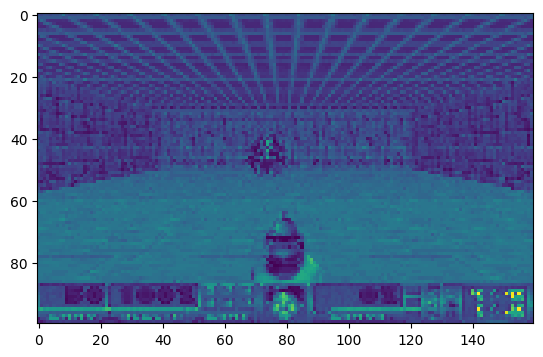

In [44]:
plt.imshow(state)

# OO

In [48]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [49]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [50]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [51]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# G

In [10]:
# import ppo for training
from stable_baselines3 import PPO

In [53]:
# Non rendered environment
env = VizDoomGym()

In [57]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=256)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


C:\Users\chour\Documents\envo\gym38\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [58]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.1     |
|    ep_rew_mean     | -33.2    |
| time/              |          |
|    fps             | 14       |
|    iterations      | 1        |
|    time_elapsed    | 17       |
|    total_timesteps | 256      |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.4        |
|    ep_rew_mean          | -33.7       |
| time/                   |             |
|    fps                  | 9           |
|    iterations           | 2           |
|    time_elapsed         | 54          |
|    total_timesteps      | 512         |
| train/                  |             |
|    approx_kl            | 0.012050043 |
|    clip_fraction        | 0.0816      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.000141  

KeyboardInterrupt: 

# 6

In [3]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [12]:
# Reload model from disc
model = PPO.load('train/train_basic/best_model_50000')

ModuleNotFoundError: No module named 'numpy._core'

In [ ]:
# Create rendered environment
env = VizDoomGym(render=True)

In [ ]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

In [ ]:
mean_reward

In [ ]:
model.predict(obs)

In [ ]:
for episode in range(100): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)